In [3]:
import cv2
#import requests
import shutil
from sklearn.model_selection import train_test_split
import glob
import numpy as np
import os
from random import shuffle 
from tqdm import tqdm 
from PIL import Image
import matplotlib.pyplot as plt

#import random
#import torch

In [2]:
import sys
print(sys.executable)

d:\Studying\GraduationThesis\venv\Scripts\python.exe


In [12]:

#Defind 2 URL of video for dataset
# List các video
#Video ngay 1
video_drunk_path = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day1"
video_undrunk_path = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day1"

#Video ngay 2
video_drunk_path_2 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day2"
video_undrunk_path_2 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day2"

#Video ngay 3
video_drunk_path_3 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day3"
video_undrunk_path_3 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day3"
#Video ngay 4
video_drunk_path_4 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day4"
video_undrunk_path_4 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day4"

#Video ngay 5
video_drunk_path_5 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day5"
video_undrunk_path_5 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day5"

#Video ngay 6
video_drunk_path_6 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day6"
video_undrunk_path_6 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day6"

#Video ngay 7
video_drunk_path_7 = "D:\\Studying\\GraduationThesis\\data\\videos\\Drunk\\Day7"
video_undrunk_path_7 = "D:\\Studying\\GraduationThesis\\data\\videos\\UnDrunk\\Day7"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" 1
images_drunk = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1"
images_undrunk = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 2
images_drunk_2 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day2"
images_undrunk_2 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day2"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 3
images_drunk_3 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day3"
images_undrunk_3 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day3"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 4
images_drunk_4 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day4"
images_undrunk_4 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day4"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 5
images_drunk_5 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day5"
images_undrunk_5 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day5"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 6
images_drunk_6 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day6"
images_undrunk_6 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day6"

# Đường dẫn tới thư mục chứa hình ảnh "drunk" và "undrunk" ngày 7
images_drunk_7 = "D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day7"
images_undrunk_7 = "D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day7"

# Đường dẫn tới thư mục chứa tất cả hình ảnh "drunk" và "undrunk"
train_undrunk = "D:\\Studying\\GraduationThesis\\data\\train_data\\undrunk"
train_drunk = "D:\\Studying\\GraduationThesis\\data\\train_data\\drunk"
test_undrunk= "D:\\Studying\\GraduationThesis\\data\\test_data\\undrunk"
test_drunk= "D:\\Studying\\GraduationThesis\\data\\test_data\\drunk"

# Đường dẫn tới thư mục train và test
train_path = "D:\\Studying\\GraduationThesis\\data\\train_data"
test_path = "D:\\Studying\\GraduationThesis\\data\\test_data"



In [6]:

# def for_videos_to_images(videos_directory, images_directory):
#     # Liệt kê tất cả các tệp trong thư mục video
#     for root, dirs, files in os.walk(videos_directory):
#         for file in files:
#             # Kiểm tra xem tệp có phải là video không
#             if file.lower().endswith(('.avi', '.mp4', '.mov', '.flv', '.wmv')):
#                 video_path = os.path.join(root, file)
#                 try : 
#                     convert_video_to_images(video_path, images_directory,1)
#                 except Exception  as e:
#                     print(f"Lỗi khi xử lý video {video_path}: {e}")
def convert_video_to_images(video_path, images_path, video_name):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print("Không thể mở video: {video_path}")
        return

    os.makedirs(images_path, exist_ok=True)

    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration_seconds = frame_count / fps

    frame_number = 0
    current_second = 0
    count = 1  

    while cap.isOpened() and current_second <= duration_seconds:
        ret, frame = cap.read()
        if ret:
            current_second = frame_number / fps        
            frame_number += 1
            # Lưu một frame từ video mỗi giây
            if frame_number % fps == 0:
                frame_filename = os.path.join(images_path, f'{video_name}_{count}.jpg')
                cv2.imwrite(frame_filename, frame)
                count += 1  # Tăng count lên 1 sau khi lưu hình ảnh
            
        else:
            break

    cap.release()
    cv2.destroyAllWindows()
            

def for_videos_to_images(videos_directory, images_directory):
    # Liệt kê tất cả các tệp trong thư mục video
    for root, dirs, files in os.walk(videos_directory):
        for file in files:
            # Kiểm tra xem tệp có phải là video không
            if file.lower().endswith(('.avi', '.mp4', '.mov', '.flv', '.wmv')):
                video_path = os.path.join(root, file)
                video_name = os.path.splitext(file)[0]  # Tên video (không bao gồm phần mở rộng)
                #images_directory_for_video = os.path.join(images_directory, video_name)  # Thư mục lưu trữ hình ảnh cho video tương ứng
                #os.makedirs(images_directory_for_video, exist_ok=True)  # Tạo thư mục lưu trữ hình ảnh nếu chưa tồn tại
                try:
                    convert_video_to_images(video_path, images_directory, video_name)
                except Exception as e:
                    print(f"Lỗi khi xử lý video {video_path}: {e}")



In [69]:
# Chuyển đổi từng video undrunk trong danh sách
# Chuyển video sang hình ảnh ngày 1
for_videos_to_images(video_drunk_path,images_drunk)
for_videos_to_images(video_undrunk_path,images_undrunk)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [7]:
# Chuyển video sang hình ảnh ngày 2
for_videos_to_images(video_drunk_path_2,images_drunk_2)
for_videos_to_images(video_undrunk_path_2,images_undrunk_2)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [8]:
# Chuyển video sang hình ảnh ngày 3
for_videos_to_images(video_drunk_path_3,images_drunk_3)
for_videos_to_images(video_undrunk_path_3,images_undrunk_3)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [9]:
# Chuyển video sang hình ảnh ngày 4
for_videos_to_images(video_drunk_path_4,images_drunk_4)
for_videos_to_images(video_undrunk_path_4,images_undrunk_4)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [14]:
# Chuyển video sang hình ảnh ngày 5
for_videos_to_images(video_drunk_path_5,images_drunk_5)
for_videos_to_images(video_undrunk_path_5,images_undrunk_5)

print("Chuyển đổi hoàn thành!")

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\Drunk\Day5\PIR-206_76.mov: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\Drunk\Day5\PIR-206_77.mov: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1295: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'

Lỗi khi xử lý video D:\Studying\GraduationThesis\data\videos\Drunk\Day5\PIR-206_78.mov: OpenCV(4.10.0) D:\

In [7]:
# Chuyển video sang hình ảnh ngày 6
for_videos_to_images(video_drunk_path_6,images_drunk_6)
for_videos_to_images(video_undrunk_path_6,images_undrunk_6)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [10]:
# Chuyển video sang hình ảnh ngày 7
#for_videos_to_images(video_drunk_path_7,images_drunk_7)
for_videos_to_images(video_undrunk_path_7,images_undrunk_7)

print("Chuyển đổi hoàn thành!")

Chuyển đổi hoàn thành!


In [3]:




# Tách dữ liệu thành tập train và tập test
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")


Tách dữ liệu thành công!


In [13]:
# Tách dữ liệu thành tập train và tập test ngày 2
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_2), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_2), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_2, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_2, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_2, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_2, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [14]:
# Tách dữ liệu thành tập train và tập test ngày 3
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_3), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_3), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_3, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_3, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_3, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_3, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [15]:
# Tách dữ liệu thành tập train và tập test ngày 4
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_4), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_4), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_4, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_4, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_4, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_4, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [17]:
# Tách dữ liệu thành tập train và tập test ngày 5
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_5), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_5), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
#for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
#    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
#    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

# Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
    shutil.copy(os.path.join(images_drunk_5, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
    shutil.copy(os.path.join(images_drunk_5, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_5, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_5, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [8]:
# Tách dữ liệu thành tập train và tập test ngày 6
train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_6), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_6), test_size=0.2, random_state=42)

# Tạo các thư mục cần thiết nếu chưa tồn tại
for directory in ["train_drunk", "train_undrunk", "test_drunk", "test_undrunk"]:
    os.makedirs(os.path.join(train_path, directory), exist_ok=True)
    os.makedirs(os.path.join(test_path, directory), exist_ok=True)

#Di chuyển các hình ảnh vào các thư mục tương ứng
for image in train_drunk_data:
   shutil.copy(os.path.join(images_drunk_6, image), os.path.join(train_path, "drunk", image))

for image in test_drunk_data:
   shutil.copy(os.path.join(images_drunk_6, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_6, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_6, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


In [11]:
# Tách dữ liệu thành tập train và tập test ngày 7
#train_drunk_data, test_drunk_data = train_test_split(os.listdir(images_drunk_7), test_size=0.2, random_state=42)
train_undrunk_data, test_undrunk_data = train_test_split(os.listdir(images_undrunk_7), test_size=0.2, random_state=42)


#Di chuyển các hình ảnh vào các thư mục tương ứng
# for image in train_drunk_data:
#    shutil.copy(os.path.join(images_drunk_7, image), os.path.join(train_path, "drunk", image))

# for image in test_drunk_data:
#    shutil.copy(os.path.join(images_drunk_7, image), os.path.join(test_path, "drunk", image))

for image in train_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_7, image), os.path.join(train_path, "undrunk", image))

for image in test_undrunk_data:
    shutil.copy(os.path.join(images_undrunk_7, image), os.path.join(test_path, "undrunk", image))

print("Tách dữ liệu thành công!")

Tách dữ liệu thành công!


Mô hình CNN

In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten,BatchNormalization, GlobalAveragePooling2D #action detectionimport tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from IPython.display import HTML
from tensorflow.keras.callbacks import ReduceLROnPlateau,EarlyStopping

# import setuptools.dist
# import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense,Dropout,Convolution2D,MaxPooling2D,Flatten #action detectionimport tensorflow
# import matplotlib.pyplot as plt
# from IPython.display import HTML

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 224

train_datagen = ImageDataGenerator(
        rescale=1./255, #Chuẩn hóa các giá trị điểm ảnh trong hình ảnh về khoảng [0, 1].
        rotation_range=10, #Tăng cường dữ liệu bằng cách xoay hình ảnh ngẫu nhiên trong khoảng [-10, 10] độ.
        horizontal_flip=True, #Lật ngược hình ảnh theo chiều ngang.
        fill_mode = 'reflect', #lấp đầy các pixel bị mất khi thực hiện các phép biến đổi.
        #width_shift_range = 0.1, #dịch chuyển hình ảnh ngẫu nhiên theo chiều ngang trong khoảng [-10%, 10%] của chiều rộng hình ảnh
        #height_shift_range = 0.1, #ịch chuyển hình ảnh ngẫu nhiên theo chiều dọc trong khoảng [-10%, 10%] của chiều cao hình ảnh.
        zoom_range = 0.05, #phóng to hoặc thu nhỏ hình ảnh ngẫu nhiên trong khoảng [80%, 120%] của kích thước gốc.
        #shear_range = 0.1, #cắt (shear transformation) với góc cắt ngẫu nhiên trong khoảng [-10%, 10%].
        brightness_range=[0.8,1.2],  # Thay đổi độ sáng
        #contrast_range=[0.8,1.2],    # Thay đổi độ tương phản
        #saturation_range=[0.8,1.2],  # Thay đổi độ bão hòa
)
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="binary"
)

Found 790 images belonging to 2 classes.


In [14]:
class_names = list(train_generator.class_indices.keys())
class_names
train_generator.class_indices

{'drunk': 0, 'undrunk': 1}

In [15]:
# Bộ dữ liệu validate
test_datagen = ImageDataGenerator(
    rescale=1./255,       # Thay đổi tỷ lệ giá trị pixel từ [0, 255] thành [0, 1]
)

# Tạo một bộ tạo dữ liệu tải hình ảnh từ thư mục được chỉ định
test_generator = test_datagen.flow_from_directory(
    test_path,                 # Đường dẫn đến thư mục chứa hình ảnh
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Thay đổi kích thước hình ảnh thành (IMAGE_SIZE, IMAGE_SIZE)
    class_mode="binary"        # Trả lại nhãn dưới dạng số nguyên
)

Found 208 images belonging to 2 classes.


In [16]:
class_names = list(test_generator.class_indices.keys())
class_names
test_generator.class_indices

{'drunk': 0, 'undrunk': 1}

In [40]:
# Kích thước hình ảnh
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Tải mô hình MobileNetV2 với trọng số đã được tiền huấn luyện trên ImageNet
base_model = MobileNetV2(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')

# Đóng băng các lớp của MobileNetV2 để không huấn luyện lại chúng
base_model.trainable = False

# Thêm các lớp tùy chỉnh ở trên cùng của MobileNetV2
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

# Biên dịch mô hình
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Tóm tắt mô hình
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_6[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [25]:

# Model điều chỉnh ngày 9/7/2024
# 94 tr
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.9664 - loss: 0.2363
#17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 432ms/step - accuracy: 0.9593 - loss: 0.2255

#Chỉnh thành 16
#stop30
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.9521 - loss: 0.1089
#17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 437ms/step - accuracy: 0.9848 - loss: 0.0692

#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, không có maxpooling ở lớp 3
#stop28
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9634 - loss: 0.1025
#17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.9716 - loss: 0.1031
#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, sửa dense  256 => Tệ
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8943 - loss: 0.3123
#17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 377ms/step - accuracy: 0.8771 - loss: 0.3324
#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, có  maxpooling ở lớp 3
# 5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9007 - loss: 0.2941 
#17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step - accuracy: 0.9488 - loss: 0.1447 
#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, không có BatchNormalization ở lớp 3 - stop 30
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.9259 - loss: 0.2083 
#17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 346ms/step - accuracy: 0.9608 - loss: 0.0790
#Chỉnh thành : Chỉnh thành 16, bỏ bớt 1 dense, có batch ở lớp 3, không có maxpooling ở lớp 3, chuyển learning rate xuống 3 - stop26
#5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.9773 - loss: 0.1018 
#17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 353ms/step - accuracy: 0.9923 - loss: 0.0603
sz = 224
# Khởi tạo mô hình CNN
model = Sequential()

# Lớp tích chập và gộp đầu tiên

model.add(Convolution2D(16, (3, 3), input_shape=(sz, sz, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Lớp tích chập và gộp thứ hai
model.add(Convolution2D(32, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Lớp tích chập và gộp thứ ba
model.add(Convolution2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Trải phẳng các lớp
model.add(Flatten())

# Thêm lớp kết nối đầy đủ
model.add(Dense(units=128, activation='relu'))
#model.add(BatchNormalization())
model.add(Dropout(0.2))
#model.add(Dense(units=32, activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=2, activation='softmax')) # sử dụng sigmoid 2 lớp

model.summary()







Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 222, 222, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 52, 52, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    22,151,296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,175,202 (84.59 MB)

 Trainable params: 22,175,170 (84.59 MB)

 Non-trainable params: 32 (128.00 B)

In [12]:
IMG_SHAPE = 224
# Khởi tạo mô hình CNN
model1 = Sequential()
#Convo 16-32-64-128 và Dense 128
#Epoch 30/60
#25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 548ms/step - accuracy: 0.9662 - loss: 0.0792 - val_accuracy: 0.9808 - val_loss: 0.0815 - learning_rate: 5.0000e-04
#Epoch 33/60
#25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 512ms/step - accuracy: 0.9843 - loss: 0.0450 - val_accuracy: 0.9760 - val_loss: 0.0592 - learning_rate: 5.0000e-04 - bestmodel128
#Epoch 36/60
#25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 529ms/step - accuracy: 0.9835 - loss: 0.0542 - val_accuracy: 0.9856 - val_loss: 0.0952 - learning_rate: 5.0000e-04

#Convo 16-32-64-128 và Dense 128-64
#Epoch 28/60
#25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 528ms/step - accuracy: 0.9801 - loss: 0.0786 - val_accuracy: 0.9663 - val_loss: 0.1522 - learning_rate: 2.5000e-04

#Convo 16-32-64-128 và Dense 256
#Epoch 34/60
#25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 506ms/step - accuracy: 0.9846 - loss: 0.0398 - val_accuracy: 0.9615 - val_loss: 0.0905 - learning_rate: 2.5000e-04
#Epoch 40/60
#25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 485ms/step - accuracy: 0.9903 - loss: 0.0333 - val_accuracy: 0.9663 - val_loss: 0.0774 - learning_rate: 6.2500e-05 - bestmodel2
#Epoch 40/60
#25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 510ms/step - accuracy: 0.9878 - loss: 0.0546 - val_accuracy: 0.9712 - val_loss: 0.0802 - learning_rate: 1.2500e-04

#Convo 32-64-128 và Dense 128
#Epoch 23/60
#25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 913ms/step - accuracy: 0.9556 - loss: 0.1016 - val_accuracy: 0.9471 - val_loss: 0.1419 - learning_rate: 5.0000e-04




# Lớp tích chập và gộp đầu tiên
model1.add(Convolution2D(16, (3, 3), input_shape=(IMG_SHAPE, IMG_SHAPE, 3), activation='relu'))
#model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# Lớp tích chập và gộp thứ hai
model1.add(Convolution2D(32, (3, 3), activation='relu'))
#model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# Lớp tích chập và gộp thứ ba
model1.add(Convolution2D(64, (3, 3), activation='relu'))
#model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# Lớp tích chập và gộp thứ tư
model1.add(Convolution2D(128, (3, 3), activation='relu'))
#model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

# Trải phẳng các lớp
model1.add(Flatten())

# Thêm các lớp kết nối đầy đủ
model1.add(Dense(128, activation='relu'))
#model1.add(BatchNormalization())
model1.add(Dropout(0.2))
#model1.add(Dense(64, activation='relu'))
# model1.add(BatchNormalization())
#model1.add(Dropout(0.2))
model1.add(Dense(1, activation='sigmoid'))  # Sử dụng sigmoid cho bài toán nhị phân

# Compile mô hình
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_loss', #, val_accuracy (độ chính xác trên tập validation) được sử dụng.
    patience=3, #nếu val_accuracy không cải thiện sau 3 epoch, learning rate sẽ bị giảm.
    factor=0.5, #learning rate sẽ bị giảm xuống một nửa mỗi khi điều kiện patience được thỏa mãn.
    min_lr=0.00001, #ngăn chặn learning rate trở nên quá nhỏ, gây ảnh hưởng đến quá trình huấn luyện.
    verbose=1 #thông báo trên console mỗi khi learning rate bị giảm.
)
# Tạo callback để dừng sớm khi mô hình không cải thiện nữa
early_stopping = EarlyStopping(
    monitor='val_loss', #val_loss (mức độ lỗi trên tập validation) được sử dụng.
    patience= 5, # nếu val_loss không cải thiện sau 5 epoch, quá trình huấn luyện sẽ dừng.
    verbose=1, #có thông báo trên console khi quá trình huấn luyện dừng sớm.
    restore_best_weights=True #khôi phục các trọng số từ epoch có hiệu suất tốt nhất trước khi dừng huấn luyện.
    )

# Tạo callback để lưu lại mô hình tốt nhất dưới dạng SavedModel
# model_checkpoint = ModelCheckpoint(
#     'model/model6.keras', 
#     monitor='val_loss', # theo dõi hiệu suất của mô hình
#     save_best_only=True, 
#     verbose=1)

#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Huấn luyện mô hình với các callback
history = model1.fit(
    train_generator,
    validation_data=test_generator,
    epochs=60, # Số lượng epoch
    callbacks=[early_stopping, learning_rate_reduction], # Các callback được sử dụng
)


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 523ms/step - accuracy: 0.5205 - loss: 0.8762 - val_accuracy: 0.5577 - val_loss: 0.6914 - learning_rate: 0.0010
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 501ms/step - accuracy: 0.5617 - loss: 0.6896 - val_accuracy: 0.5577 - val_loss: 0.6905 - learning_rate: 0.0010
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 497ms/step - accuracy: 0.5837 - loss: 0.6812 - val_accuracy: 0.5721 - val_loss: 0.6875 - learning_rate: 0.0010
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 503ms/step - accuracy: 0.5586 - loss: 0.6808 - val_accuracy: 0.5817 - val_loss: 0.6564 - learning_rate: 0.0010
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 506ms/step - accuracy: 0.6869 - loss: 0.6232 - val_accuracy: 0.6490 - val_loss: 0.5865 - learning_rate: 0.0010
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 504ms/step - accuracy: 0.6953 - loss: 0.5724 - val_accuracy: 0.6923 - val_loss: 0.5474 - learning_rate: 0.0010
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 15s 504ms/step - accuracy: 0.7010 - loss: 0.

In [36]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
# Tạo một bộ tạo dữ liệu tải hình ảnh từ thư mục được chỉ định
test_generator_augment_off  = test_datagen.flow_from_directory(
    test_path,                 # Đường dẫn đến thư mục chứa hình ảnh
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  # Thay đổi kích thước hình ảnh thành (IMAGE_SIZE, IMAGE_SIZE)
    #class_model ="binary",      # Trả lại nhãn dưới dạng số nguyên,
    shuffle=False
)
# Đoạn mã để huấn luyện mô hình của bạn ở đây...
# Ví dụ: model1.fit(train_generator, validation_data=val_generator, epochs=50)

# Dự đoán nhãn cho dữ liệu kiểm tra
y_pred_prob = model1.predict(test_generator_augment_off)
y_pred = (y_pred_prob > 0.5).astype("int32")  # Chuyển xác suất thành nhãn (0 hoặc 1)
print(y_pred)

# Lấy nhãn thực tế
y_true = test_generator_augment_off.classes
print(y_true)

# Tính toán Precision, Recall và F1 Score
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Found 208 images belonging to 2 classes.


d:\Studying\GraduationThesis\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 

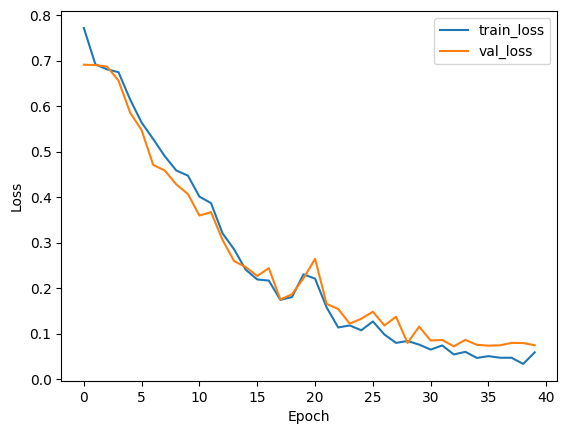

In [16]:
import matplotlib.pyplot as plt

# Vẽ đồ thị loss và val_loss qua các epoch
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


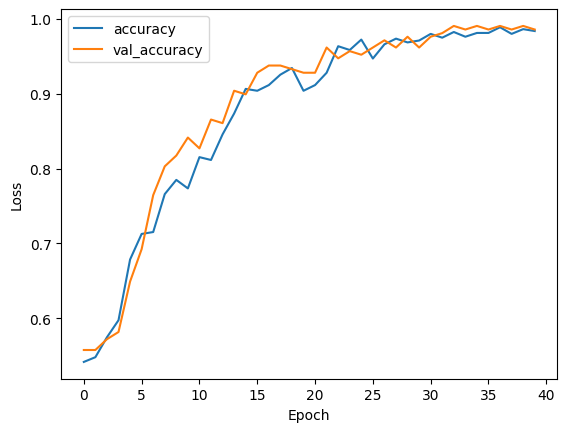

In [20]:
import matplotlib.pyplot as plt

# Vẽ đồ thị loss và val_loss qua các epoch
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# Compile mô hình
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [77]:
# Đánh giá hiệu suất của mô hình trên tập dữ liệu kiểm tra
scores = model1.evaluate(test_generator)
scores = model1.evaluate(train_generator)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9739 - loss: 0.0577 
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 422ms/step - accuracy: 0.9942 - loss: 0.0247


In [99]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Lấy các dự đoán và nhãn thực tế từ mô hình
predictions = model.predict(test_generator_augment_off)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator_augment_off.classes

# Tính toán các độ đo đánh giá
report = classification_report(true_classes, predicted_classes)
conf_matrix = confusion_matrix(true_classes, predicted_classes)

print(report)
print(conf_matrix)

# Để lấy recall và F1 score riêng lẻ:
from sklearn.metrics import recall_score, f1_score

recall = recall_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print("Macro-averaged Recall:", recall)
print("Macro-averaged F1 Score:", f1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 142ms/step
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        75
           1       0.94      0.98      0.96        63

    accuracy                           0.96       138
   macro avg       0.96      0.97      0.96       138
weighted avg       0.96      0.96      0.96       138

[[71  4]
 [ 1 62]]
Macro-averaged Recall: 0.9653968253968254
Macro-averaged F1 Score: 0.9636133523176713


In [46]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

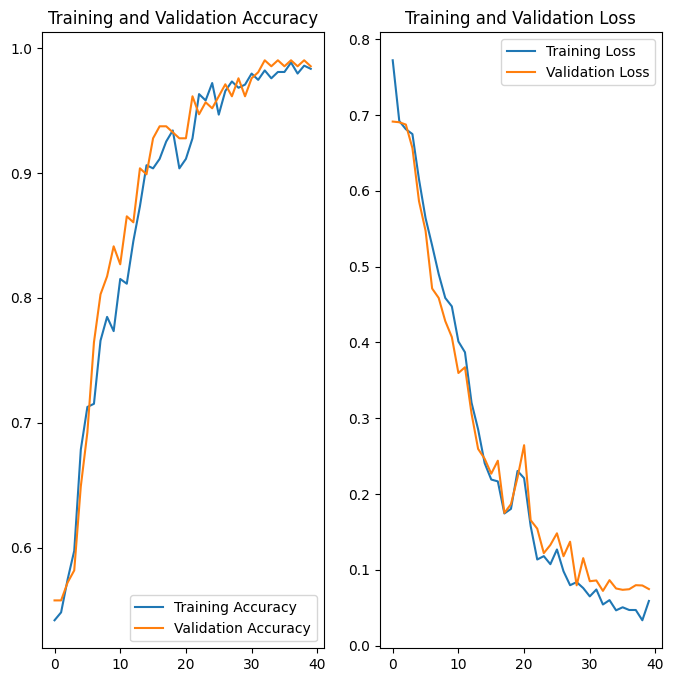

In [19]:
import matplotlib.pyplot as plt
EPOCHS = 40

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [5]:
# Tải lại mô hình đã lưu
# loaded_model = tf.keras.models.load_model('models/best_model')  # hoặc 'model/my_model.keras'
model =tf.keras.models.load_model('model/best_model_128.keras')
# Kiểm tra mô hình đã tải lại
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_54 (Conv2D)              │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_50 (MaxPooling2D) │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_55 (Conv2D)              │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_51 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_56 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_52 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_57 (Conv2D)              │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_53 (MaxPooling2D) │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │     2,359,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,370,981 (28.12 MB)

 Trainable params: 2,456,993 (9.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,913,988 (18.75 MB)

In [18]:
def predict(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    #Điều này biến mảng từ dạng (height, width, channels) thành (1, height, width, channels)
    img_array = tf.expand_dims(img_array, 0)
    #print(img_array)
    predictions = model1.predict(img_array)
    print('predictions')
    print(predictions)
    print('predictions argmax')
    print(np.argmax(predictions[0]))
    predicted_class = class_names[np.argmax(predictions[0])]
    print('predicted_class')
    print(predicted_class)
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

def predict_binary(model, image):
    img_array = tf.keras.preprocessing.image.img_to_array(image)
    # Điều này biến mảng từ dạng (height, width, channels) thành (1, height, width, channels)
    img_array = tf.expand_dims(img_array, 0)
    # Dự đoán kết quả từ mô hình
    predictions = model.predict(img_array)
    # Lấy giá trị dự đoán (0 hoặc 1)
    predicted_class_idx = int(predictions[0] > 0.5)  # Nếu giá trị > 0.5 thì là lớp 1, ngược lại là lớp 0
    predicted_class = class_names[predicted_class_idx]
    # Tính độ tin cậy của dự đoán
    confidence = round(100 * predictions[0][0], 2) if predicted_class_idx == 1 else round(100 * (1 - predictions[0][0]), 2)
    return predicted_class, confidence


['drunk', 'undrunk']
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1.0
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1.0
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1.0
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

C:\Users\Admin\AppData\Local\Temp\ipykernel_13548\3451543105.py:24: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_idx = int(predictions[0] > 0.5)  # Nếu giá trị > 0.5 thì là lớp 1, ngược lại là lớp 0


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1.0
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
0.0
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1.0
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.0
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.0
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1.0
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1.0
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.0
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
0.0
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
0.0
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.0
1.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1.0
0.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
0.0


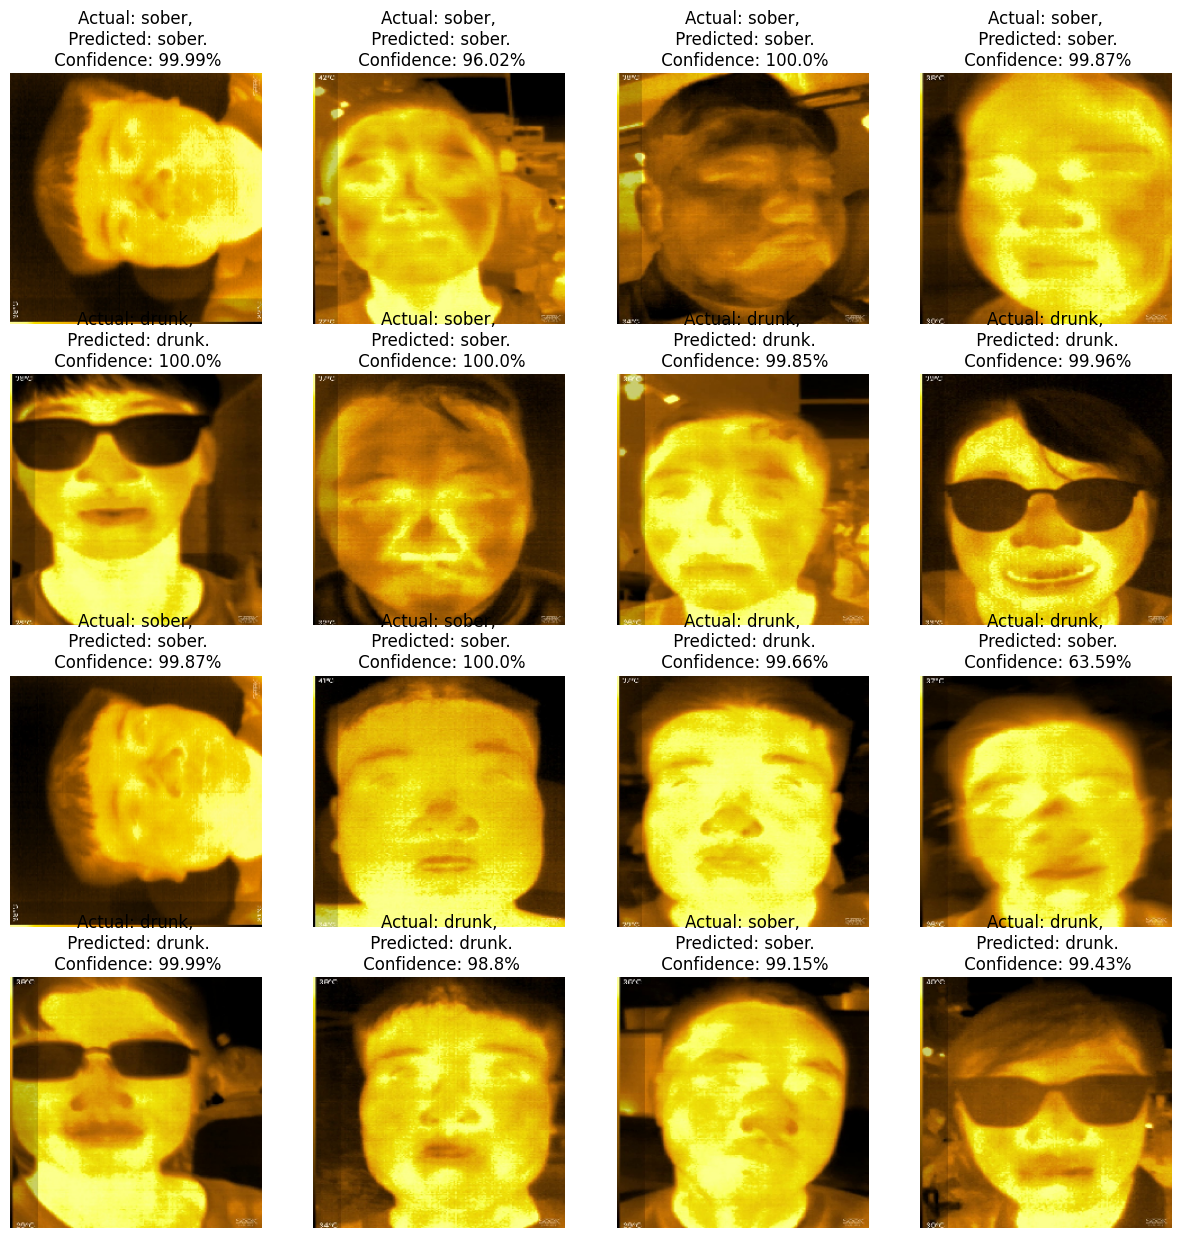

In [19]:
plt.figure(figsize=(15, 15))
print(class_names)
for images, labels in test_generator:
    for i in range(16):
        print(labels[i])
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict_binary(model, images[i])
        
        print(labels[i])
        actual_class = "drunk" if class_names[int(labels[i])] == "drunk" else "sober"  # Nhãn thực tế

        plt.title(f"Actual: {actual_class},\n Predicted: {"drunk" if predicted_class == "drunk" else "sober"}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [17]:
# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model1.export('models/best_model_128')
model1.save("model/best_model_128.keras")


NameError: name 'model1' is not defined

In [55]:
import numpy as np
import tensorflow as tf


# Tạo một mô hình Sequential
trained_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

# Biên dịch mô hình với hàm mất mát và trình tối ưu
trained_model.compile(optimizer='sgd', loss='mean_squared_error') 

# Dữ liệu đầu vào và đầu ra
x_train = np.array([-1, 0, 1], dtype=np.float32)
y_train = np.array([-3, -1, 1], dtype=np.float32)

# Huấn luyện mô hình
trained_model.fit(x=x_train, y=y_train, epochs=5)

trained_model.export('models/model')

# Tạo một TFLite Converter từ mô hình đã huấn luyện
converter = tf.lite.TFLiteConverter.from_saved_model('models/model')
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Chuyển đổi mô hình thành định dạng TensorFlow Lite
tflite_converted_model = converter.convert()

# Lưu mô hình TensorFlow Lite vào một tệp .tflite
with open('trained_model.tflite', 'wb') as f:
    f.write(tflite_converted_model)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 3.2120
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 2.9897
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 2.7620
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 2.5467
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 2.3420
INFO:tensorflow:Assets written to: models/model\assets


INFO:tensorflow:Assets written to: models/model\assets


Saved artifact at 'models/model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_387')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2623005083408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005083024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005084368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005084944: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005084752: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2623005085712: TensorSpec(shape=(), dtype=tf.resource, name=None)


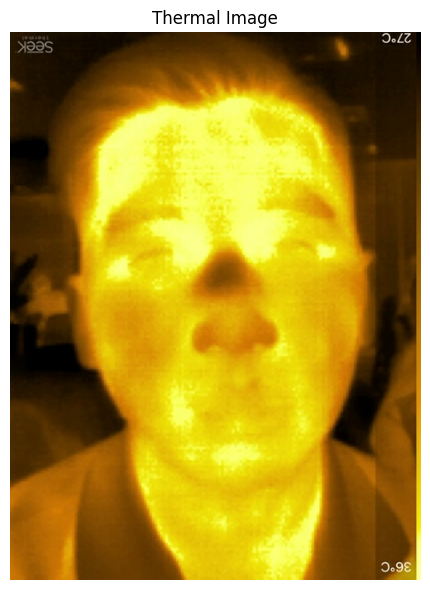

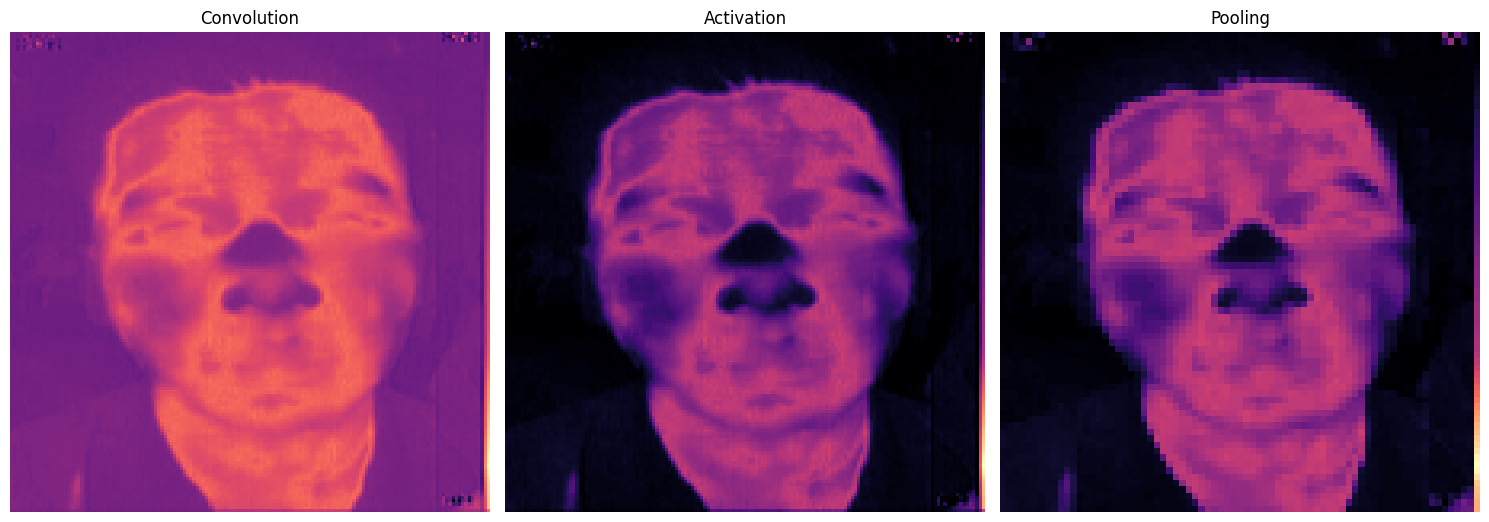

In [60]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Thiết lập các tham số cho đồ họa
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([
    [[-1, -1, -1],  # Channel 1
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 2
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 3
     [-1,  8, -1],
     [-1, -1, -1]],
])

# Load the image (RGB image this time)
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_3_2.jpg')



image = tf.io.decode_jpeg(image, channels=3)  # Specify 3 channels for RGB
# Plot the RGB image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

image = tf.image.resize(image, size=[300, 300])



# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
# Reshape kernel để phù hợp với số lượng kênh màu của ảnh (3 kênh)
kernel = tf.reshape(kernel, [*kernel.shape, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=2,
    padding='SAME',
)

plt.figure(figsize=(15, 10))

# Plot the convolved image
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()


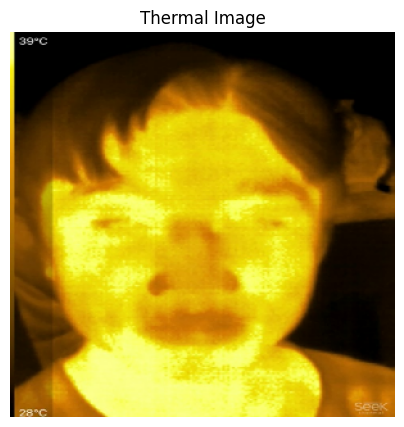

Red channel - Mean: 148.03797912597656, Stddev: 95.1294174194336, Min: 0.0, Max: 255.0
Green channel - Mean: 121.58226776123047, Stddev: 93.34330749511719, Min: 0.0, Max: 255.0
Blue channel - Mean: 17.076629638671875, Stddev: 33.85854721069336, Min: 0.0, Max: 240.5496826171875


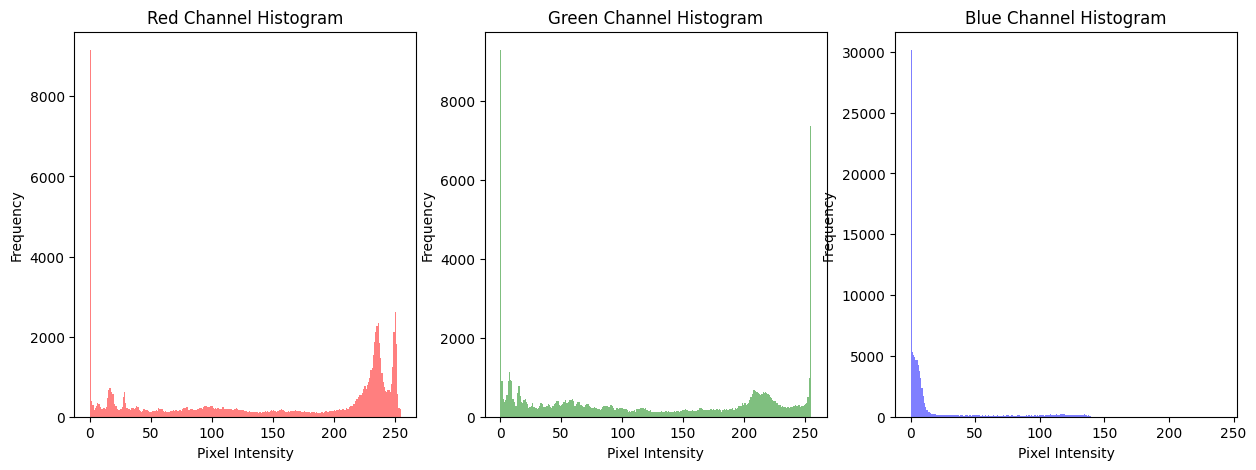

In [12]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Tải hình ảnh
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_13_2.jpg')
image = tf.io.decode_jpeg(image, channels=3)  # Đọc ảnh với 3 kênh màu (RGB)
image = tf.image.resize(image, size=[300, 300])

# Hiển thị hình ảnh
img = tf.squeeze(image).numpy().astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

# Chuyển đổi hình ảnh thành kiểu dữ liệu float32
image = tf.image.convert_image_dtype(image, dtype=tf.float32)

# Tách các kênh màu
r, g, b = tf.split(image, num_or_size_splits=3, axis=-1)

# Tính toán các đặc trưng màu sắc
def compute_color_features(channel):
    mean = tf.reduce_mean(channel)
    stddev = tf.math.reduce_std(channel)
    min_val = tf.reduce_min(channel)
    max_val = tf.reduce_max(channel)
    return mean, stddev, min_val, max_val

r_mean, r_stddev, r_min, r_max = compute_color_features(r)
g_mean, g_stddev, g_min, g_max = compute_color_features(g)
b_mean, b_stddev, b_min, b_max = compute_color_features(b)

# In ra các đặc trưng màu sắc
print(f"Red channel - Mean: {r_mean.numpy()}, Stddev: {r_stddev.numpy()}, Min: {r_min.numpy()}, Max: {r_max.numpy()}")
print(f"Green channel - Mean: {g_mean.numpy()}, Stddev: {g_stddev.numpy()}, Min: {g_min.numpy()}, Max: {g_max.numpy()}")
print(f"Blue channel - Mean: {b_mean.numpy()}, Stddev: {b_stddev.numpy()}, Min: {b_min.numpy()}, Max: {b_max.numpy()}")

# Vẽ histogram của các kênh màu
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(tf.reshape(r, [-1]), bins=256, color='red', alpha=0.5)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(tf.reshape(g, [-1]), bins=256, color='green', alpha=0.5)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(tf.reshape(b, [-1]), bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()


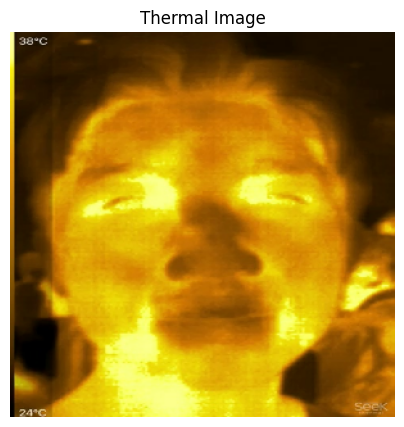

Red channel - Mean: 162.0916290283203, Stddev: 75.91597747802734, Min: 0.0, Max: 255.0
Green channel - Mean: 117.75628662109375, Stddev: 71.66792297363281, Min: 0.0, Max: 255.0
Blue channel - Mean: 10.513372421264648, Stddev: 25.873741149902344, Min: 0.0, Max: 228.09971618652344


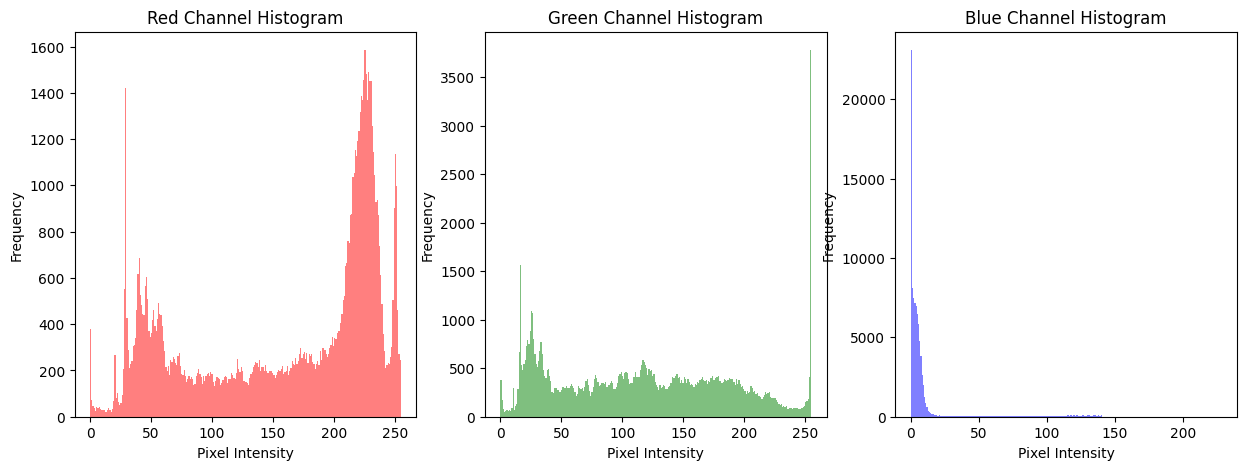

In [22]:
# Tải hình ảnh
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_11_1.jpg')
image = tf.io.decode_jpeg(image, channels=3)  # Đọc ảnh với 3 kênh màu (RGB)
image = tf.image.resize(image, size=[300, 300])

# Hiển thị hình ảnh
img = tf.squeeze(image).numpy().astype(np.uint8)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

# Chuyển đổi hình ảnh thành kiểu dữ liệu float32
image = tf.image.convert_image_dtype(image, dtype=tf.float32)

# Tách các kênh màu
r, g, b = tf.split(image, num_or_size_splits=3, axis=-1)

# Tính toán các đặc trưng màu sắc
def compute_color_features(channel):
    mean = tf.reduce_mean(channel)
    stddev = tf.math.reduce_std(channel)
    min_val = tf.reduce_min(channel)
    max_val = tf.reduce_max(channel)
    return mean, stddev, min_val, max_val

r_mean, r_stddev, r_min, r_max = compute_color_features(r)
g_mean, g_stddev, g_min, g_max = compute_color_features(g)
b_mean, b_stddev, b_min, b_max = compute_color_features(b)

# In ra các đặc trưng màu sắc
print(f"Red channel - Mean: {r_mean.numpy()}, Stddev: {r_stddev.numpy()}, Min: {r_min.numpy()}, Max: {r_max.numpy()}")
print(f"Green channel - Mean: {g_mean.numpy()}, Stddev: {g_stddev.numpy()}, Min: {g_min.numpy()}, Max: {g_max.numpy()}")
print(f"Blue channel - Mean: {b_mean.numpy()}, Stddev: {b_stddev.numpy()}, Min: {b_min.numpy()}, Max: {b_max.numpy()}")

# Vẽ histogram của các kênh màu
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(tf.reshape(r, [-1]), bins=256, color='red', alpha=0.5)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(tf.reshape(g, [-1]), bins=256, color='green', alpha=0.5)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(tf.reshape(b, [-1]), bins=256, color='blue', alpha=0.5)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.show()

Overall color index (RGB): 97.51810980902778


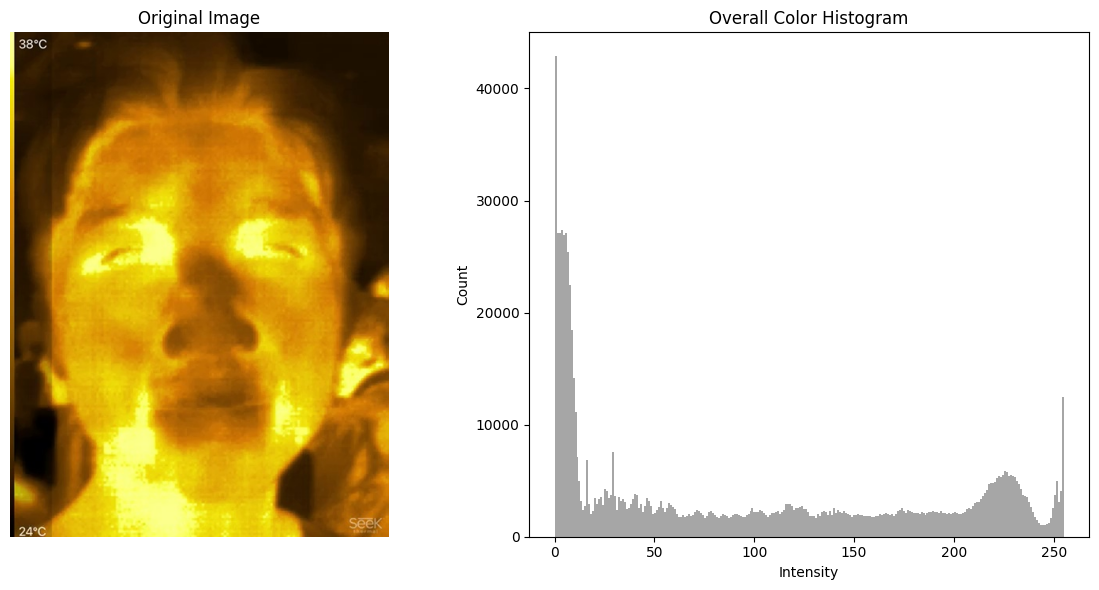

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đọc hình ảnh
image = cv2.imread('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_11_1.jpg')

# Chuyển đổi hình ảnh sang không gian màu RGB (nếu không phải)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tính toán chỉ số màu sắc tổng thể (trung bình của tất cả các kênh màu)
overall_color_index = np.mean(image_rgb)

# Hiển thị chỉ số màu sắc tổng thể
print("Overall color index (RGB):", overall_color_index)

# Hiển thị hình ảnh
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Vẽ histogram dựa trên chỉ số màu sắc tổng thể
plt.subplot(1, 2, 2)
image_flat = image_rgb.ravel()
plt.hist(image_flat, bins=256, color='gray', alpha=0.7)
plt.title('Overall Color Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

# Hiển thị đồ thị và hình ảnh
plt.tight_layout()
plt.show()


Overall color index (RGB): 96.22978624131945


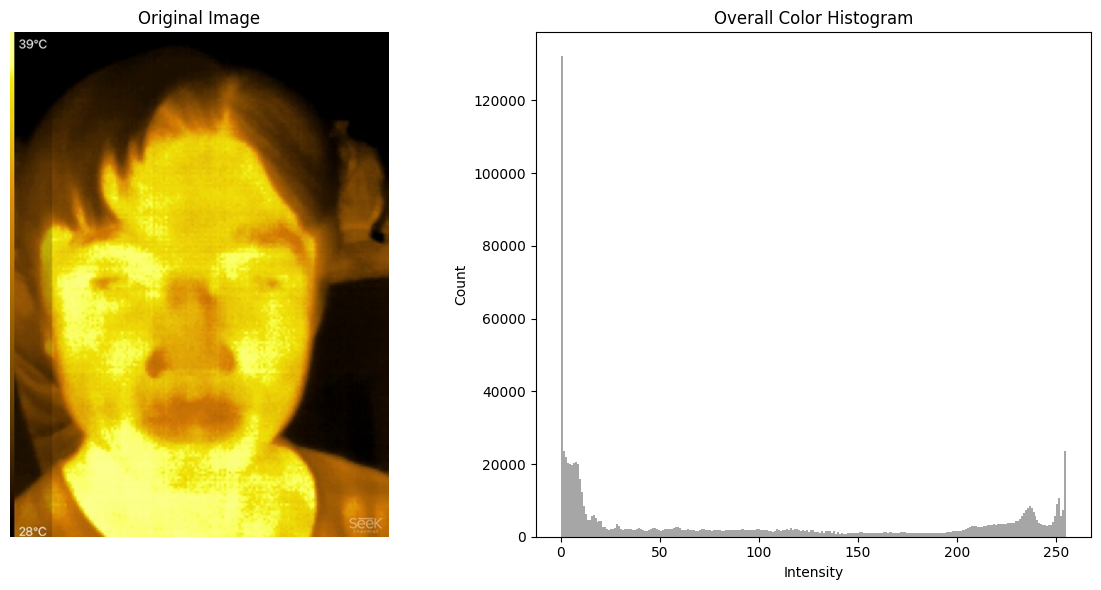

In [5]:
# Đọc hình ảnh
image = cv2.imread('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_13_2.jpg')

# Chuyển đổi hình ảnh sang không gian màu RGB (nếu không phải)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Tính toán chỉ số màu sắc tổng thể (trung bình của tất cả các kênh màu)
overall_color_index = np.mean(image_rgb)

# Hiển thị chỉ số màu sắc tổng thể
print("Overall color index (RGB):", overall_color_index)

# Hiển thị hình ảnh
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

# Vẽ histogram dựa trên chỉ số màu sắc tổng thể
plt.subplot(1, 2, 2)
image_flat = image_rgb.ravel()
plt.hist(image_flat, bins=256, color='gray', alpha=0.7)
plt.title('Overall Color Histogram')
plt.xlabel('Intensity')
plt.ylabel('Count')

# Hiển thị đồ thị và hình ảnh
plt.tight_layout()
plt.show()


Overall color index (RGB) for Image 1: 97.51810980902778
Overall color index (RGB) for Image 2: 96.22978624131945


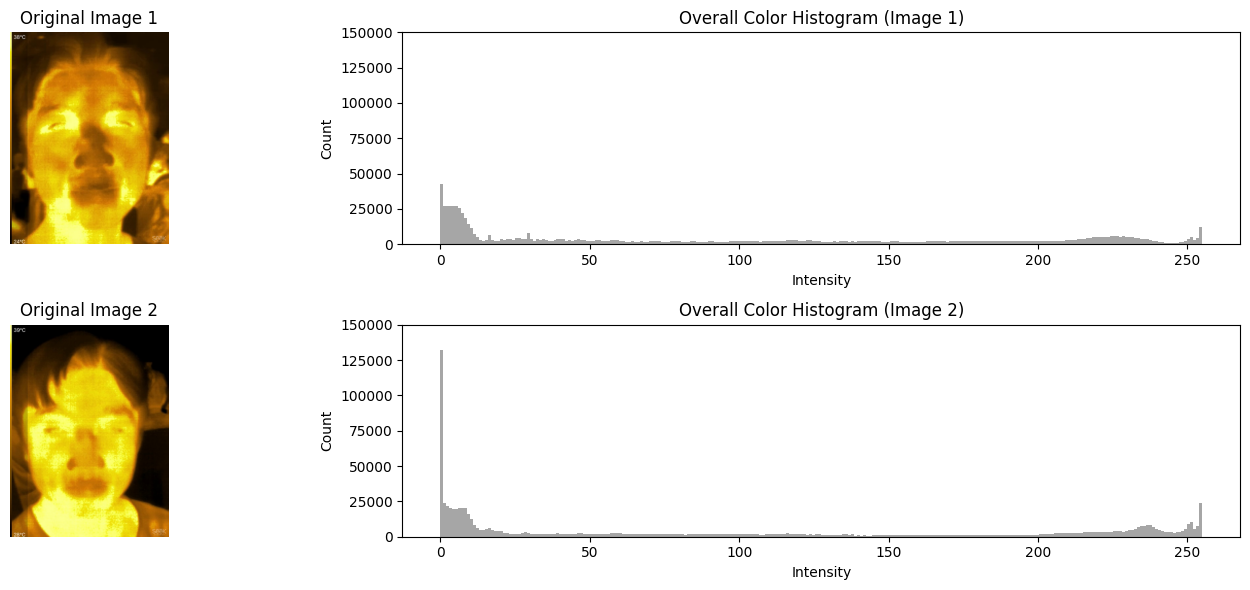

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Đọc hình ảnh đầu tiên
image1 = cv2.imread('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_11_1.jpg')
# Đọc hình ảnh thứ hai
image2 = cv2.imread('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_13_2.jpg')

# Chuyển đổi hình ảnh sang không gian màu RGB (nếu không phải)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# Tính toán chỉ số màu sắc tổng thể (trung bình của tất cả các kênh màu) cho cả hai hình ảnh
overall_color_index1 = np.mean(image1_rgb)
overall_color_index2 = np.mean(image2_rgb)

# Hiển thị chỉ số màu sắc tổng thể
print("Overall color index (RGB) for Image 1:", overall_color_index1)
print("Overall color index (RGB) for Image 2:", overall_color_index2)

# Hiển thị hình ảnh và biểu đồ histogram
plt.figure(figsize=(16, 6))

# Hiển thị hình ảnh đầu tiên
plt.subplot(2, 2, 1)
plt.imshow(image1_rgb)
plt.title('Original Image 1')
plt.axis('off')

# Vẽ histogram cho hình ảnh đầu tiên
plt.subplot(2, 2, 2)
image1_flat = image1_rgb.ravel()
plt.hist(image1_flat, bins=256, color='gray', alpha=0.7)
plt.title('Overall Color Histogram (Image 1)')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.ylim(0, 150000)

# Hiển thị hình ảnh thứ hai
plt.subplot(2, 2, 3)
plt.imshow(image2_rgb)
plt.title('Original Image 2')
plt.axis('off')

# Vẽ histogram cho hình ảnh thứ hai
plt.subplot(2, 2, 4)
image2_flat = image2_rgb.ravel()
plt.hist(image2_flat, bins=256, color='gray', alpha=0.7)
plt.title('Overall Color Histogram (Image 2)')
plt.xlabel('Intensity')
plt.ylabel('Count')
plt.ylim(0, 150000)

# Hiển thị đồ thị và hình ảnh
plt.tight_layout()
plt.show()


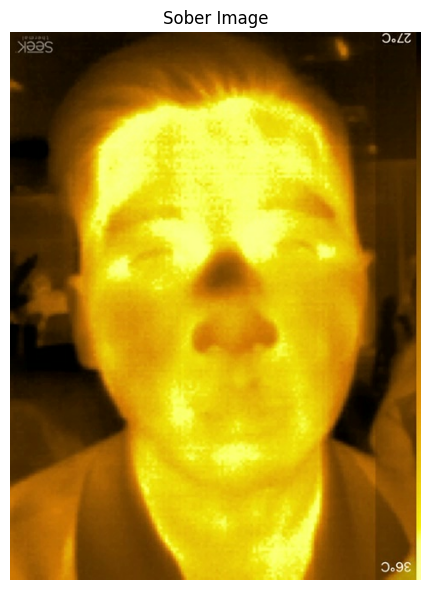

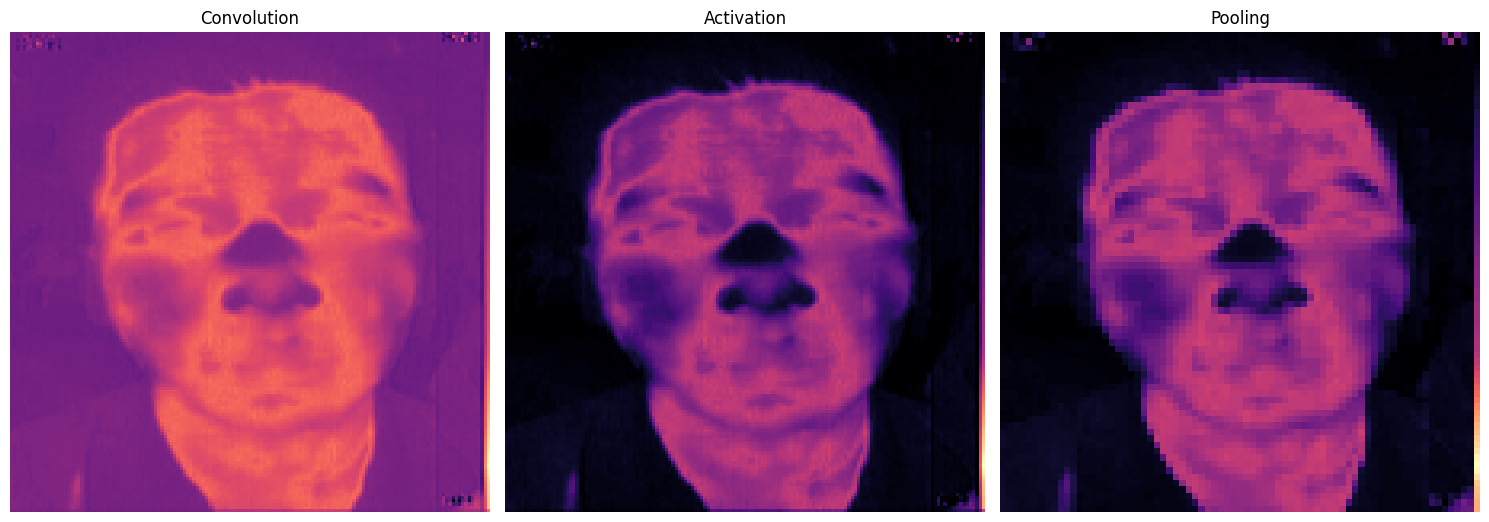

Red channel - Mean: 30.769115447998047, Stddev: 38.35282897949219, Min: 0.0, Max: 139.8176727294922
Green channel - Mean: 97.515625, Stddev: 40.57236862182617, Min: 2.5840728282928467, Max: 143.7139129638672
Blue channel - Mean: 46.71146011352539, Stddev: 51.71928405761719, Min: 0.0, Max: 255.0


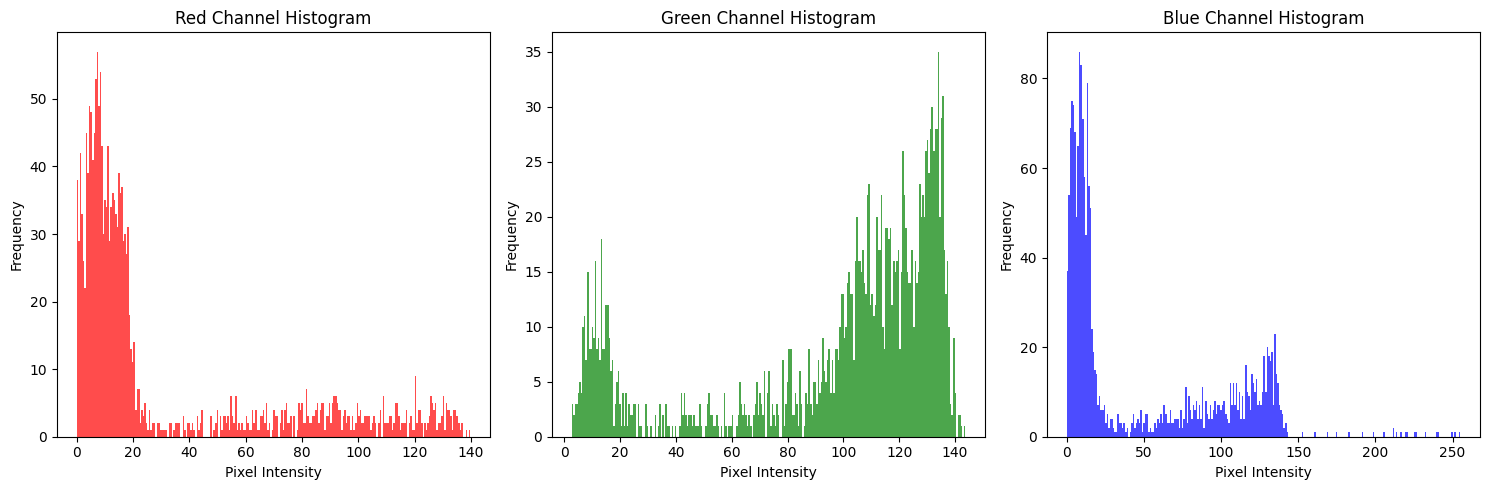

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Thiết lập các tham số cho đồ họa
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([
    [[-1, -1, -1],  # Channel 1
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 2
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 3
     [-1,  8, -1],
     [-1, -1, -1]],
])

# Load the image (RGB image this time)
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\undrunk\\day1\\PIR-206_3_2.jpg')
image = tf.io.decode_jpeg(image, channels=3)  # Specify 3 channels for RGB

# Plot the RGB image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title('Sober Image')
plt.show()

image = tf.image.resize(image, size=[300, 300])

# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
# Reshape kernel để phù hợp với số lượng kênh màu của ảnh (3 kênh)
kernel = tf.reshape(kernel, [*kernel.shape, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=2,
    padding='SAME',
)

plt.figure(figsize=(15, 10))

# Plot the convolved image
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

# Convert pooled image back to image format
image_condense = tf.squeeze(image_condense)

# Normalize pixel values to range [0, 255]
image_condense = (image_condense - tf.reduce_min(image_condense)) / (tf.reduce_max(image_condense) - tf.reduce_min(image_condense))
image_condense = image_condense * 255

# Separate the channels
r, g, b = tf.split(image_condense, num_or_size_splits=3, axis=-1)

# Tính toán các đặc trưng màu sắc
def compute_color_features(channel):
    mean = tf.reduce_mean(channel)
    stddev = tf.math.reduce_std(channel)
    min_val = tf.reduce_min(channel)
    max_val = tf.reduce_max(channel)
    return mean, stddev, min_val, max_val

r_mean, r_stddev, r_min, r_max = compute_color_features(r)
g_mean, g_stddev, g_min, g_max = compute_color_features(g)
b_mean, b_stddev, b_min, b_max = compute_color_features(b)

# In ra các đặc trưng màu sắc
print(f"Red channel - Mean: {r_mean.numpy()}, Stddev: {r_stddev.numpy()}, Min: {r_min.numpy()}, Max: {r_max.numpy()}")
print(f"Green channel - Mean: {g_mean.numpy()}, Stddev: {g_stddev.numpy()}, Min: {g_min.numpy()}, Max: {g_max.numpy()}")
print(f"Blue channel - Mean: {b_mean.numpy()}, Stddev: {b_stddev.numpy()}, Min: {b_min.numpy()}, Max: {b_max.numpy()}")

# Plot histograms for each channel
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(r.numpy().ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(g.numpy().ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(b.numpy().ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

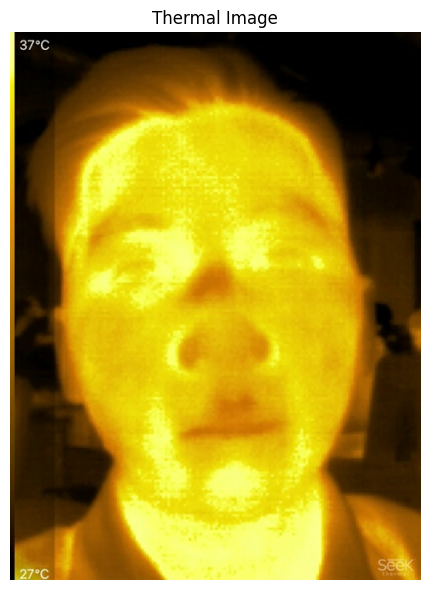

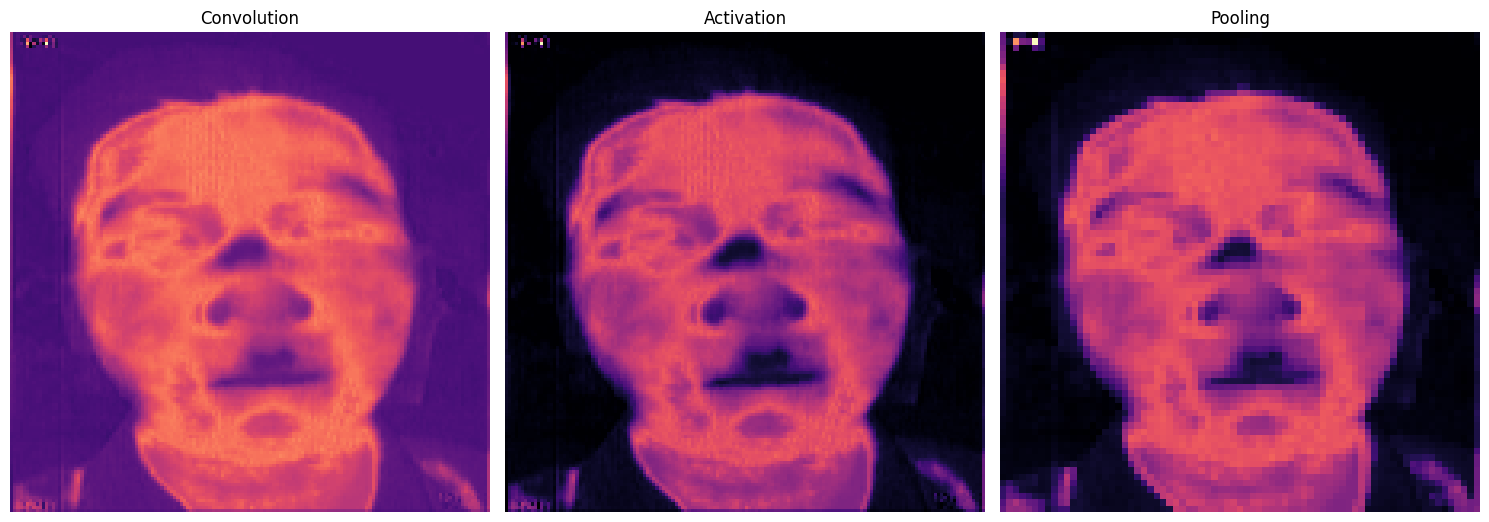

Red channel - Mean: 57.53874969482422, Stddev: 61.078853607177734, Min: 0.0, Max: 255.0
Green channel - Mean: 117.02981567382812, Stddev: 51.26713180541992, Min: 0.0, Max: 172.01483154296875
Blue channel - Mean: 49.575340270996094, Stddev: 57.055702209472656, Min: 0.0, Max: 167.65834045410156


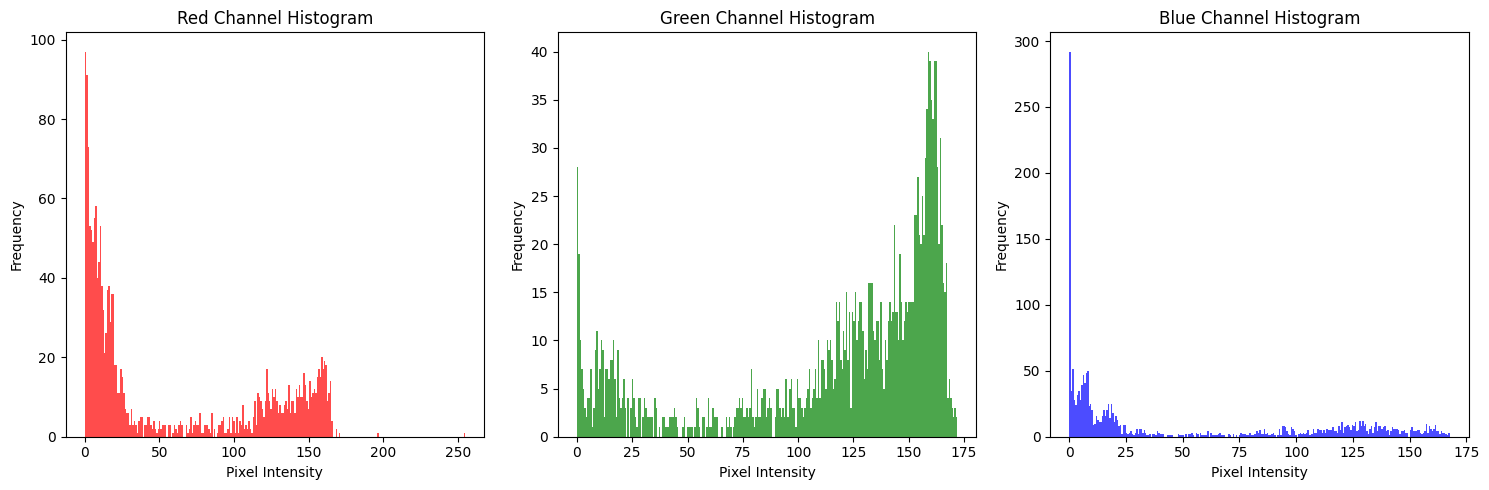

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Thiết lập các tham số cho đồ họa
plt.rc('figure', autolayout=True)
plt.rc('image', cmap='magma')

# Define the kernel
kernel = tf.constant([
    [[-1, -1, -1],  # Channel 1
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 2
     [-1,  8, -1],
     [-1, -1, -1]],

    [[-1, -1, -1],  # Channel 3
     [-1,  8, -1],
     [-1, -1, -1]],
])

# Load the image (RGB image this time)
image = tf.io.read_file('D:\\Studying\\GraduationThesis\\data\\images\\drunk\\day1\\PIR-206_14_2.jpg')
image = tf.io.decode_jpeg(image, channels=3)  # Specify 3 channels for RGB

# Plot the RGB image
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis('off')
plt.title('Thermal Image')
plt.show()

image = tf.image.resize(image, size=[300, 300])

# Reformat
image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
# Reshape kernel để phù hợp với số lượng kênh màu của ảnh (3 kênh)
kernel = tf.reshape(kernel, [*kernel.shape, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

# Convolution layer
conv_fn = tf.nn.conv2d
image_filter = conv_fn(
    input=image,
    filters=kernel,
    strides=2,
    padding='SAME',
)

plt.figure(figsize=(15, 10))

# Plot the convolved image
plt.subplot(1, 3, 1)
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.title('Convolution')

# Activation layer
relu_fn = tf.nn.relu
# Image detection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.title('Activation')

# Pooling layer
pool = tf.nn.pool
image_condense = pool(
    input=image_detect,
    window_shape=(2, 2),
    pooling_type='MAX',
    strides=(2, 2),
    padding='SAME',
)

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()

# Convert pooled image back to image format
image_condense = tf.squeeze(image_condense)

# Normalize pixel values to range [0, 255]
image_condense = (image_condense - tf.reduce_min(image_condense)) / (tf.reduce_max(image_condense) - tf.reduce_min(image_condense))
image_condense = image_condense * 255

# Separate the channels
r, g, b = tf.split(image_condense, num_or_size_splits=3, axis=-1)

# Tính toán các đặc trưng màu sắc
def compute_color_features(channel):
    mean = tf.reduce_mean(channel)
    stddev = tf.math.reduce_std(channel)
    min_val = tf.reduce_min(channel)
    max_val = tf.reduce_max(channel)
    return mean, stddev, min_val, max_val

r_mean, r_stddev, r_min, r_max = compute_color_features(r)
g_mean, g_stddev, g_min, g_max = compute_color_features(g)
b_mean, b_stddev, b_min, b_max = compute_color_features(b)

# In ra các đặc trưng màu sắc
print(f"Red channel - Mean: {r_mean.numpy()}, Stddev: {r_stddev.numpy()}, Min: {r_min.numpy()}, Max: {r_max.numpy()}")
print(f"Green channel - Mean: {g_mean.numpy()}, Stddev: {g_stddev.numpy()}, Min: {g_min.numpy()}, Max: {g_max.numpy()}")
print(f"Blue channel - Mean: {b_mean.numpy()}, Stddev: {b_stddev.numpy()}, Min: {b_min.numpy()}, Max: {b_max.numpy()}")



# Plot histograms for each channel
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(r.numpy().ravel(), bins=256, color='red', alpha=0.7)
plt.title('Red Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(g.numpy().ravel(), bins=256, color='green', alpha=0.7)
plt.title('Green Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(b.numpy().ravel(), bins=256, color='blue', alpha=0.7)
plt.title('Blue Channel Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()